# SEL0634 - Laboratório de Robôs Manipuladores

## Inicialização da biblioteca 

In [1]:
!pip install spatialmath-python
!pip install sympy

In [2]:
import numpy as np
from spatialmath import *
from math import pi

import matplotlib.pyplot as plt
# no Binder utilizar essa linha
# %matplotlib notebook  
# no Colab utilizar essa linha
%matplotlib inline


## Tarefa 1 - Sequencia de Rotações Aplicadas em um Cubo

### Desenhar cubo na posição inicial

Considere a seguinte função para desenhar os vértices de um cubo:

In [3]:
def plot_cubo_grafico(cubo,grafico):
  grafico.scatter(xs=cubo[0], ys=cubo[1], zs=cubo[2], s=20)  # draw vertices
  # draw lines joining the vertices
  lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
  #lines = [[0,1,5,6]]
  for line in lines:
      grafico.plot([cubo[0,i] for i in line], [cubo[1,i] for i in line], [cubo[2,i] for i in line])
    # List comprehension, https://stackoverflow.com/questions/11479392/what-does-a-for-loop-within-a-list-do-in-python
    
def plot_cubo(cubo):
  fig = plt.figure()
  SE3().plot(frame='0', dims=[-2,3,-2,3,0,5], color='black') # Plot system of coordinates
  grafico = plt.gca()
  plot_cubo_grafico(cubo,grafico)

Considere que na posição inicial, o cubo possui vértices $^0P_i$ posicionados  em relação ao sistema inercial $\{0\}$ nas seguintes coordenadas:

In [4]:
P = np.array([[0, 2, 2, 0, 0, 2, 2, 0], [0, 0, 2, 2, 0, 0, 2, 2], [0, 0, 0, 0, 2, 2, 2, 2]])
print("cubo = ", P)
print("cubo[0] = ", P[0])
print("cubo[1] = ", P[1])
print("cubo[2] = ", P[2])

lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
#lines = [[5,6], [6,7], [7,4], [4,5]]
line = lines[1]
print(lines[0][1])
print("cubo[0,i],cubo[1,i],cubo[2,i] = ", [P[0,i] for i in line], [P[1,i] for i in line], [P[2,i] for i in line])
# https://stackoverflow.com/questions/16505000/numpy-difference-between-aij-and-ai-j

cubo =  [[0 2 2 0 0 2 2 0]
 [0 0 2 2 0 0 2 2]
 [0 0 0 0 2 2 2 2]]
cubo[0] =  [0 2 2 0 0 2 2 0]
cubo[1] =  [0 0 2 2 0 0 2 2]
cubo[2] =  [0 0 0 0 2 2 2 2]
1
cubo[0,i],cubo[1,i],cubo[2,i] =  [2, 2, 2, 0] [0, 2, 2, 2] [0, 0, 2, 2]


Para plotar o cubo:

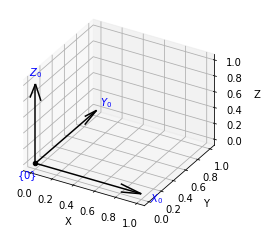

<Figure size 432x288 with 0 Axes>

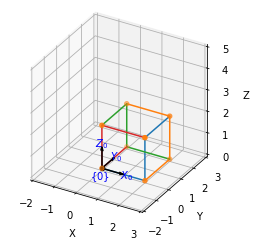

In [5]:
SE3().plot(frame='0', color='black') # Plot system of coordinates
plot_cubo(P)

### Primeira transformação

Aplique uma rotação no cubo em torno do eixo $x$ de um ângulo de $90^o$ e mostre os vertices do cubo nesta nova pose. Nesta seção não serão considerados movimentos de translação; portanto pode-se utilizar matrizes SO3 (Special Ortogonal n = 3). Alternativamente, matrizes SE3 (Special Euclidean n = 3) podem ser adotadas, mantendo o quadrante de translação sempre nulo.

Considere que um sistema de coordenadas fixo no cubo após esta rotação está com orientação dada por $\{1\}$, ou seja, após essa primeira rotação, a matriz $^0R_1$ representa a orientação do sistema de coordenadas fixo no cubo em relação ao sistema inercial. 

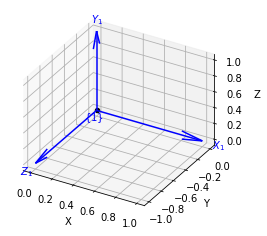

<Figure size 432x288 with 0 Axes>

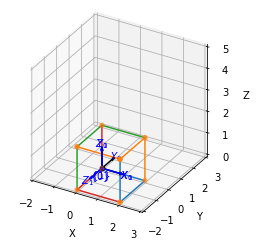

In [6]:
#########################
# Coloque seu código aqui
# Por simplicidade, vamos usar matrizes SO3. Utilizaremos SE3 mais adiante neste mesmo arquivo.
R01 = SO3.Rx(90,'deg') # Rotação

# H01 = R01, não há translação
P01 = R01*P

R01.plot(frame='1') # mostra o sistema de coordenadas com orientação dada por R01
#########################
plot_cubo(P01)
R01.plot(frame='1') # mostra o sistema de coordenadas com orientação dada por R01

### Segunda transformação

Aplique uma nova rotação no cubo em torno do eixo $z$ do sistema atual $\{1\}$ de um ângulo de $90^0$, e mostre os vértices do cubo nesta nova pose. 

Considere que o sistema de coordenadas fixo no cubo após esta operação está com orientação dada por $\{2\}$, ou seja, a matriz $^0R_2$ representa a orientação do cubo em relação ao sistema inercial.



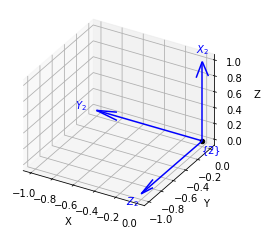

<Figure size 432x288 with 0 Axes>

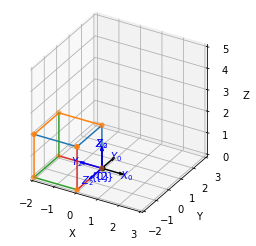

In [7]:
#########################
# Coloque seu código aqui
R12 = SO3.Rz(90,'deg')
R12

R02 = R01*R12 # Sistema atual: pós-multiplicação
P02 = R02*P

R02.plot(frame='2') # mostra o sistema de coordenadas com orientação dada por R02
########################
plot_cubo(P02)
R02.plot(frame='2') # mostra o sistema de coordenadas com orientação dada por R02

### Terceira transformação

Aplique uma nova rotação no cubo em torno do eixo $y$ do sistema inercial $\{0\}$ de um ângulo de $90^0$, e mostre os vértices do cubo nesta nova pose. 

Considere que o sistema de coordenadas fixo no cubo após esta operação está com orientação dada por $\{3\}$, ou seja, a matriz $^0R_3$ representa a orientação do cubo em relação ao sistema inercial.




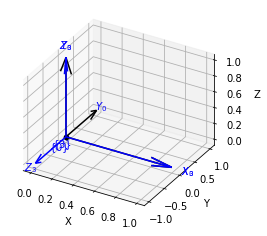

<Figure size 432x288 with 0 Axes>

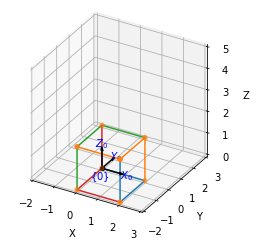

In [8]:
#########################
# Coloque seu código aqui
R3 = SO3.Ry(90,'deg')
R03 = R3*R02 # Rotação no sistema inercial {0}: pré-multiplicação
P03 = R03*P

#########################
SE3().plot(frame='0', color='black') # Plot system of coordinates
R03.plot(frame='3') # sistema de coordenadas com orientação dada por R03
#plot_cubo(P02)
plot_cubo(P03)
#R03.plot(frame='3') # mostra o sistema de coordenadas com orientação dada por R03

### Matrizes de rotação

Quais são as matrizes de rotação: 

$^0R_1 =$

In [9]:
# Mostre a matriz de rotação aqui
#R01 = SE3.Rx(90,'deg') # Special Euclidean, 4x4 homogeneous transf. matrix
R01 = SO3.Rx(90,'deg') # Special Ortogonal, 3x3 rotation matrix
print(R01)

   1         0         0         
   0         0        -1         
   0         1         0         



$^0R_2 = $

In [10]:
# Mostre a matriz de rotações aqui
#R02 = R01*SE3.Rz(90,'deg')
R02 = R01*SO3.Rz(90,'deg')
print(R02)

   0        -1         0         
   0         0        -1         
   1         0         0         



$^0R_3 = $

In [11]:
# Mostre a matriz de rotações aqui
#R03 = SE3.Ry(90,'deg')*R02
R03 = SO3.Ry(90,'deg')*R02
print(R03)

   1         0         0         
   0         0        -1         
   0         1         0         



# **Testes com Rotação e Translação: SE(3)**

Nesta seção as transformações anteriores serão repetidas com a adição de um termo translacional. Para realizar movimentos de translação e rotação, é necessário utilizar matrizes de transformação homogênea do espaço Special Euclidean n = 3. Estas matrizes possuem dimensão 4x4 e podem ser subdivididas em quatro quadrantes, como mostrado abaixo.

<!--
<h1><center>
$
^0H_1 = \begin{bmatrix}
^0R_1 & ^0d_1 \\
0 & 1
\end{bmatrix}
$
</center></h1>
-->

$$
^0H_1 = \begin{bmatrix}
^0R_1 & ^0d_1 \\
0 & 1
\end{bmatrix}
$$

Onde $^0R_1$ é a matriz de rotação, $^0d_1 = \begin{bmatrix} ^0x_1 \\ ^0y_1 \\ ^0z_1 \end{bmatrix} = \begin{bmatrix} ^0x_1 & ^0y_1 & ^0z_1 \end{bmatrix}^T$ é a matriz de rotação, 0 = \[0 0 0\] e 1 = \[1\]. 

<!--
### Primeira transformação
## Primeira transformação
# Primeira transformação
-->

### Translação
Vamos aplicar uma uma translação na posição inicial do cubo. Para exemplificar, podemos deslocar a origem de $(0,0,0)_0$ para $x = -1$, $y = 1$ e $z = 2$, ou $^0d_1 = [-1 \quad 1 \quad 2]^T$. A parte rotacional na matriz de transformação homogênea deverá ser igual à matriz identidade 3x3 (translação pura).

<Figure size 432x288 with 0 Axes>

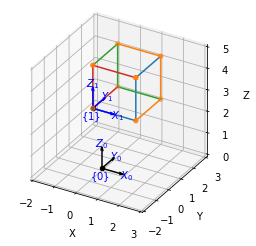

In [12]:
T01 = SE3(-1,1,2) # Translação.
P0t = T01*P
#########################
plot_cubo(P0t) # Plot do cubo transladado
T01.plot(frame='1') # mostra o sistema de coordenadas com orientação dada por T01

### Primeira transformação
Vamos repetir a rotação no cubo em torno do eixo $x$ de um ângulo de $90^o$, adicionando uma translação de $^0d_1 = [-1 \quad 1 \quad 2]^T$.

Observe que, para obter corretamente a matriz de transformação homogênea $H \in SE(3)$ com duas matrizes $T \in SE(3)$ e $R \in SE(3)$ construídas pela biblioteca Spatial Math, é importante realizar primeiro a translação e depois a rotação - visto que o produto matricial não é comutativo.

$$
T = \begin{bmatrix}
1 & 0 & 0 & d_x \\
0 & 1 & 0 & d_y \\
0 & 0 & 1 & d_z \\
0 & 0 & 0 \ & 1
\end{bmatrix}, \
R = \begin{bmatrix}
r_{11} & r_{12} & r_{13} & 0 \\
r_{11} & r_{12} & r_{13} & 0 \\
r_{11} & r_{12} & r_{13} & 0 \\
 \ \ 0 & \ \ \ 0 & \ \ \ 0 \ & 1
\end{bmatrix}
$$

$$
H = T \cdot R = \begin{bmatrix}
r_{11} & r_{12} & r_{13} & d_x \\
r_{11} & r_{12} & r_{13} & d_y \\
r_{11} & r_{12} & r_{13} & d_z \\
0 & 0 & 0 & 1
\end{bmatrix} \ne \begin{bmatrix}
r_{11} & r_{12} & r_{13} & r_{11}d_x+r_{12}d_y+r_{13}d_z \\
r_{11} & r_{12} & r_{13} & r_{21}d_x+r_{22}d_y+r_{23}d_z  \\
r_{11} & r_{12} & r_{13} & r_{31}d_x+r_{32}d_y+r_{33}d_z  \\
0 & 0 & 0 & 1
\end{bmatrix}
= R\cdot T
$$

T01 = 
    1         0         0        -1         
   0         1         0         1         
   0         0         1         2         
   0         0         0         1         

R01 = 
    1         0         0         0         
   0         0        -1         0         
   0         1         0         0         
   0         0         0         1         

H01 = T01*R01 = 
    1         0         0        -1         
   0         0        -1         1         
   0         1         0         2         
   0         0         0         1         

Obseve que H01 = T01*R01 != R0*T01:

R01*T01 = 
    1         0         0        -1         
   0         0        -1        -2         
   0         1         0         1         
   0         0         0         1         



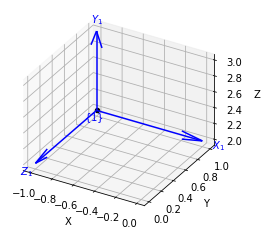

<Figure size 432x288 with 0 Axes>

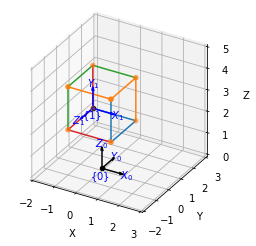

In [13]:
#########################
# Coloque seu código aqui
d01 = [-1,1,2] # Vetor de translação
#H01 = SE3(d01)*SE3.Rx(90,'deg') # Criação da matriz de transf. homog. diretamente, ou, por partes:
T01 = SE3(d01) # Translação
R01 = SE3.Rx(90,'deg') # Rotação
H01 = T01*R01 # Matriz de transformação homogênea completa

# H01 = R01, não há translação
P01 = H01*P

H01.plot(frame='1') # mostra o sistema de coordenadas com orientação dada por R01
#########################
plot_cubo(P01)
H01.plot(frame='1') # mostra o sistema de coordenadas com orientação dada por R01

print("T01 = \n",T01)
print("R01 = \n",R01)
print("H01 = T01*R01 = \n", H01)

print("Obseve que H01 = T01*R01 != R0*T01:\n")
#print("T01*R01 = \n",T01*R01)
print("R01*T01 = \n",R01*T01)

### Segunda transformação
Agora vamos aplicar uma nova rotação no cubo em torno do eixo $z$ do sistema atual $\{1\}$ de um ângulo de $90^0$, juntamente com uma translação $d_{12} = [3 \quad 3 \quad 3]^T$.

[-1, 1, 2]
[3, 3, 3]
   0        -1         0         2         
   0         0        -1        -2         
   1         0         0         5         
   0         0         0         1         



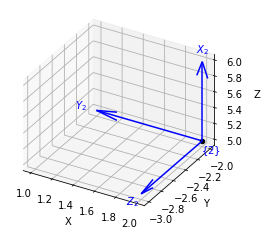

<Figure size 432x288 with 0 Axes>

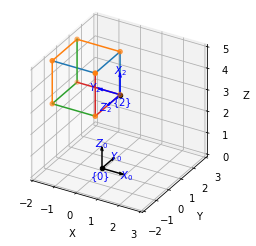

In [14]:
#########################
# Coloque seu código aqui

# Para subtrair listas no formato list1-list2, utilize np.subtract(list1,list2)
d12 = [3, 3, 3]

T12 = SE3(d12) # Translação
R12 = SE3.Rz(90,'deg')
H12 = T12*R12

H02 = H01*H12 # Sistema atual: pós-multiplicação
P02 = H02*P

H02.plot(frame='2') # mostra o sistema de coordenadas com orientação dada por R02
########################
plot_cubo(P02)
H02.plot(frame='2') # mostra o sistema de coordenadas com orientação dada por R02

print(d01)
print(d12)
print(H02)

### Terceira transformação

Na posição atual em que o cubo se encontra, isto é, $\{2\}$, aplique uma nova rotação no cubo em torno do eixo $y$ do sistema inercial $\{0\}$ de um ângulo de $90^0$ em relação ao eixo $y$. Aplique também uma translação em uma unidade em cada um dos eixos $x,y,z$.

   1         0         0         6         
   0         0        -1        -1         
   0         1         0        -1         
   0         0         0         1         



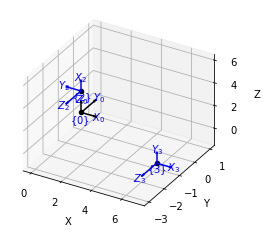

<Figure size 432x288 with 0 Axes>

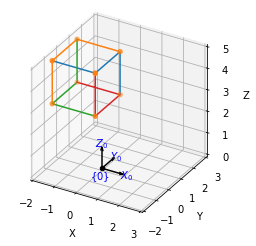

<Figure size 432x288 with 0 Axes>

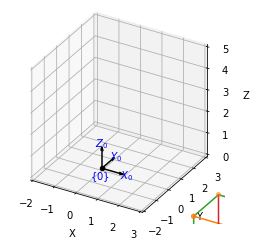

In [15]:
#########################
# Coloque seu código aqui
R3 = SE3(1,1,1)*SE3.Ry(90,'deg')
H03 = R3*H02 # Rotação no sistema inercial {0}: pré-multiplicação
P03 = H03*P

#########################
SE3().plot(frame='0', color='black') # Plot system of coordinates
H02.plot(frame='2') # sistema de coordenadas com orientação dada por H02
H03.plot(frame='3') # sistema de coordenadas com orientação dada por H03

plot_cubo(P02)
plot_cubo(P03)
#R03.plot(frame='3') # mostra o sistema de coordenadas com orientação dada por R03

print(H03) # Não funcionou! Pré-multiplicando R3 para aplicar Ry0(90), a rotação é realizada corretamente, porém
# o vetor de translação também é afetado, causando um deslocamento indesejado para (5,-3,-2)_0. Como proceder?